# Week 07: Support Vector Machine 
Data source:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
<br> https://archive.ics.uci.edu/ml/datasets/heart+disease
<br> Youtube link: https://www.youtube.com/watch?v=_YPScrckx28&t=3s
<br>https://www.youtube.com/watch?v=ny1iZ5A8ilA
<br> https://deepnote.com/@bhavesh-bhatt/svm-c-gamma-hyperparameter-ec7cdd4f-b499-4b4d-a320-f483e8099691

In [5]:
import numpy as np
import pandas as pd

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.shape

(1025, 14)

In [9]:
# df = df.drop('ID', axis = 1)
# df.shape

In [10]:
# df.rename({'default.payment.next.month' : 'DEFAULT'}, axis = 1, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Missing data

In [12]:
# df_missing = df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0 )] # logical OR
# df_missing.sample()
# len(df_missing)
# print('Percentage of missing value is ', round((len(df_missing)/len(df)*100),2), '%    < 1%')

In [13]:
# len(df)

In [14]:
# df_no_missing = df.loc[(df['MARRIAGE'] != 0) & (df['EDUCATION'] != 0) ] # Logical AND

In [15]:
# df_no_missing['EDUCATION'].unique()
# df_no_missing['MARRIAGE'].unique()

In [16]:
# df_no_missing.head()

In [17]:
# df_no_missing.loc[df_no_missing['DEFAULT'] == 0]
df_0 = df[(df['target'] == 0)]
df_1 = df[(df['target'] == 1)]
print('target is 0 = ', len(df_0))
print('target is 1 = ', len(df_1))

target is 0 =  499
target is 1 =  526


In [18]:
df_0_resample = resample (df_0, replace = True, n_samples = 1000, random_state = 42)
len(df_0_resample)

1000

In [19]:
df_1_resample = resample (df_1, replace = True, n_samples = 1000, random_state = 42)
len(df_1_resample)

1000

In [20]:
df_resample = pd.concat([df_0_resample, df_1_resample])
len(df_resample)

2000

In [21]:
df_resample.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
560,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
189,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
969,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
193,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
562,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1


### Split dataset to target and features

In [22]:
X = df_resample.drop('target', axis = 1)
y = df_resample['target']

In [23]:
print(X.shape, y.shape)

(2000, 13) (2000,)


### Encoding Categorical Variable
#### One Hot Encoding: 
[1] sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True) https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
<br> [2] pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
<br> https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html



In [24]:
# X_encoded = pd.get_dummies(X, columns = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0','PAY_2', 'PAY_3','PAY_4', 'PAY_5','PAY_6'])
# X_encoded.sample(6)

In [25]:
# X_encoded.shape

### Scaling

In [26]:
 X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1500, 13) (500, 13) (1500,) (500,)


In [27]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [28]:
# X_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
# X_scaled_df.shape

In [29]:
display(X_train.head(2))
display(X_train_scaled)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
640,46,0,0,138,243,0,0,152,1,0.0,1,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


array([[-0.95549521, -1.48036798, -0.91577759, ..., -0.64149385,
        -0.73889079, -0.47829735],
       [ 0.71624991,  0.67550772, -0.91577759, ...,  0.98942272,
         0.26412838,  1.07798471],
       [-0.28679716,  0.67550772, -0.91577759, ..., -0.64149385,
        -0.73889079, -3.59086147],
       ...,
       [ 0.27045121,  0.67550772, -0.91577759, ..., -0.64149385,
         0.26412838,  1.07798471],
       [ 2.16509567, -1.48036798,  0.04415699, ...,  0.98942272,
         0.26412838, -0.47829735],
       [ 0.27045121,  0.67550772, -0.91577759, ..., -0.64149385,
        -0.73889079, -2.03457941]])

### Preliminary Support Vector Machine

In [30]:
svm = SVC(random_state = 42)
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

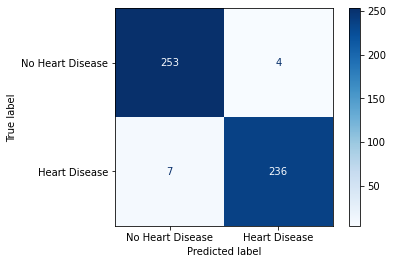

In [31]:
import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(svm, X_test_scaled, y_test, 
                      values_format = 'd',
                      display_labels = ['No Heart Disease', 'Heart Disease']
                      , cmap = 'Blues')

In [50]:
print("No Heart Disease = ", 253+4)
print("Heart Disease' = ", 7+236, '\n')
print('Correctly classified "No Heart Disease" group =', 
      round(253/(253+4)*100,2), '%')
print('Correctly classified "Heart Disease" group =', 
      round(236/(7+236)*100,2), '%')

No Heart Disease =  257
Heart Disease' =  243 

Correctly classified "No Heart Disease" group = 98.44 %
Correctly classified "Heart Disease" group = 97.12 %


### Cross validation and GridSearchCV
scoring: 'accuracy'
    'balanced accuracy',
    'f1_micro',
    'f1_macro',
    'f1_weighted',
    'roc_auc'

In [33]:
param_grid = [
    {'C': [0.5, 1, 10, 50], #C>0
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]

In [34]:
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5
                             , scoring = 'accuracy',
                             verbose = 0)

In [35]:
 optimal_params.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 50],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [36]:
print(optimal_params.best_params_)

{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


## Final SVM

In [37]:
svm = SVC(random_state = 42, C=50, gamma = 'scale')
svm.fit(X_train_scaled, y_train)

SVC(C=50, random_state=42)

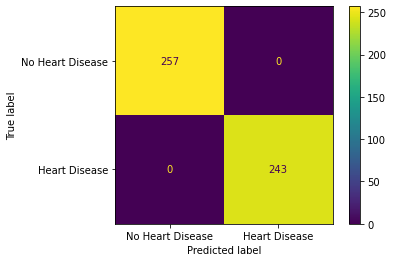

In [49]:
plot_confusion_matrix(svm, X_test_scaled, y_test, 
                      values_format = 'd',
                     display_labels = ['No Heart Disease', 'Heart Disease'])

In [39]:
len(df_resample.columns)

14